## Environment Setup

In [2]:
# conda install -c conda-forge cartopy
# !pip install -Iv plotly==3.6.1   #MUST use package plotly 3.6.1 !!
# !pip install us
import us
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# %matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import seaborn as sns
import time
import warnings
from datetime import datetime, timedelta
import cartopy.crs as ccrs
from matplotlib import animation,rc
import io
import base64
from IPython.display import HTML, display
from cartopy.feature import NaturalEarthFeature, LAND, COASTLINE
warnings.filterwarnings('ignore')
df = pd.read_csv(open('globalterrorismdb_revised.csv','rU'), encoding='utf-8', engine='c')
df.head()


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,1.970000e+11,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,1.970000e+11,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,1.970000e+11,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,1.970000e+11,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,1.970000e+11,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


## Data Cleaning and Descriptive Analyses

In [3]:
### Data Cleaning
terror = df.iloc[:, [
    1, 7, 8, 9, 10, 11, 12, 13, 14, 18, 26, 28, 29, 34, 35, 58, 64, 81, 82, 98,
    101, 106, 129
]]
terror.head()

,iyear,country,country_txt,region,region_txt,provstate,city,latitude,longitude,summary,...,targtype1,targtype1_txt,gname,motive,weaptype1,weaptype1_txt,nkill,nwound,propextent_txt,dbsource
0,1970,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.4568,-69.951164,NaN,...,14.0,Private Citizens & Property,MANO-D,NaN,13,Unknown,1.0,0.0,NaN,PGIS
1,1970,130,Mexico,1,North America,Federal,Mexico city,19.3719,-99.086624,NaN,...,7.0,Government (Diplomatic),23rd of September Communist League,NaN,13,Unknown,0.0,0.0,NaN,PGIS
2,1970,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.4786,120.599741,NaN,...,10.0,Journalists & Media,Unknown,NaN,13,Unknown,1.0,0.0,NaN,PGIS
3,1970,78,Greece,8,Western Europe,Attica,Athens,37.9975,23.762728,NaN,...,7.0,Government (Diplomatic),Unknown,NaN,6,Explosives,NaN,NaN,NaN,PGIS
4,1970,101,Japan,4,East Asia,Fukouka,Fukouka,33.5804,130.396361,NaN,...,7.0,Government (Diplomatic),Unknown,NaN,8,Incendiary,NaN,NaN,NaN,PGIS


In [7]:
### preprocessing before analysis
terror.rename(
    columns={
        'iyear': 'Year',
        'imonth': 'Month',
        'iday': 'Day',
        'country_txt': 'Country',
        'region_txt': 'Region',
        'attacktype1_txt': 'Attack_Type',
        'target1': 'Target',
        'nkill': 'Killed',
        'nwound': 'Wounded',
        'summary': 'Summary',
        'gname': 'Group',
        'targtype1_txt': 'Target_type',
        'weaptype1_txt': 'Weapon_type',
        'motive': 'Motive'
    },
    inplace=True)
terror['casualities']=terror['Killed']+terror['Wounded']

In [8]:
### basic analysis
print('Country with Highest Terrorist Attacks:',
      terror['Country'].value_counts().index[0])
print('Regions with Highest Terrorist Attacks:',
      terror['Region'].value_counts().index[0])
print('Cities with Highest Terrorist Attacks:',
      terror['city'].value_counts().index[1]) # not index 0 because it is unknown
print('Groups attacks most:',
      terror['Group'].value_counts().index[1])
print('Maximum people killed in an attack are:', terror['Killed'].max(),
      'that took place in', terror.loc[terror['Killed'].idxmax()].Country)

Country with Highest Terrorist Attacks: Iraq
Regions with Highest Terrorist Attacks: Middle East & North Africa
Cities with Highest Terrorist Attacks: Baghdad
Groups attacks most: Taliban
Maximum people killed in an attack are: 1570.0 that took place in Iraq


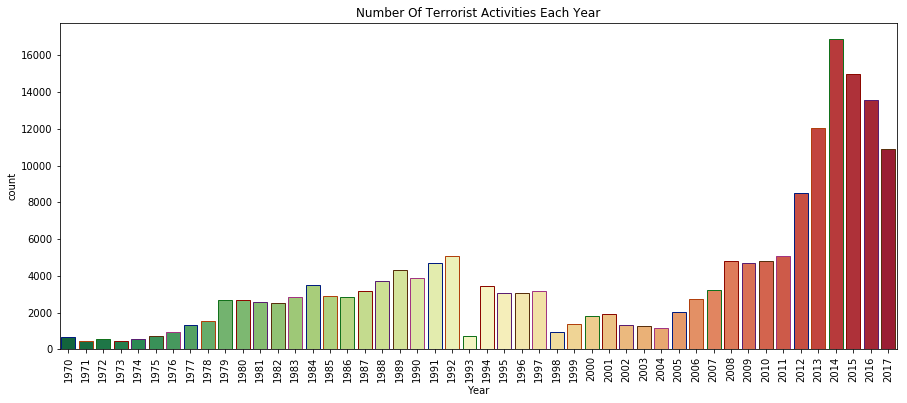

In [19]:
### Number Of Terrorist Activities Each Year
plt.subplots(figsize=(15, 6))
sns.countplot(
    'Year',
    data=terror,
    palette='RdYlGn_r',
    edgecolor=sns.color_palette('dark', 7))
plt.xticks(rotation=90)
plt.title('Number Of Terrorist Activities Each Year')
plt.savefig('num.png')

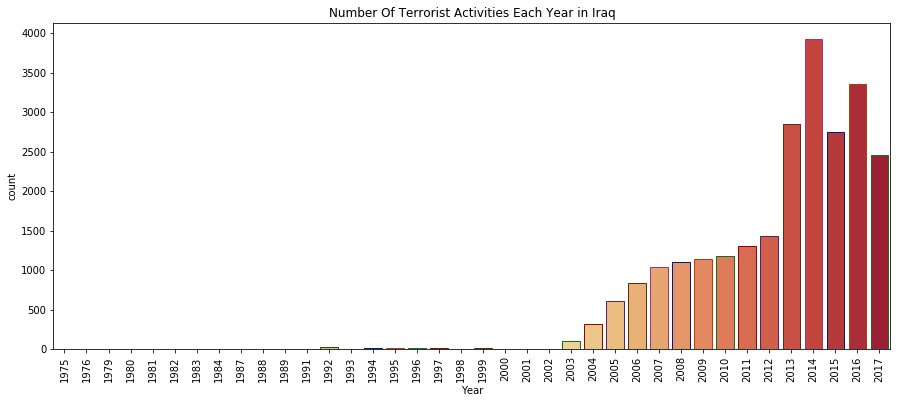

In [20]:
### Number Of Terrorist Activities Each Year in Iraq
iraq=terror[terror['Country']=='Iraq']
plt.subplots(figsize=(15, 6))
sns.countplot(
    'Year',
    data=iraq,
    palette='RdYlGn_r',
    edgecolor=sns.color_palette('dark', 7))
plt.xticks(rotation=90)
plt.title('Number Of Terrorist Activities Each Year in Iraq')# Iraq war started since 2003, when the terrorist activities arised.
plt.savefig('Iraq_num.png')

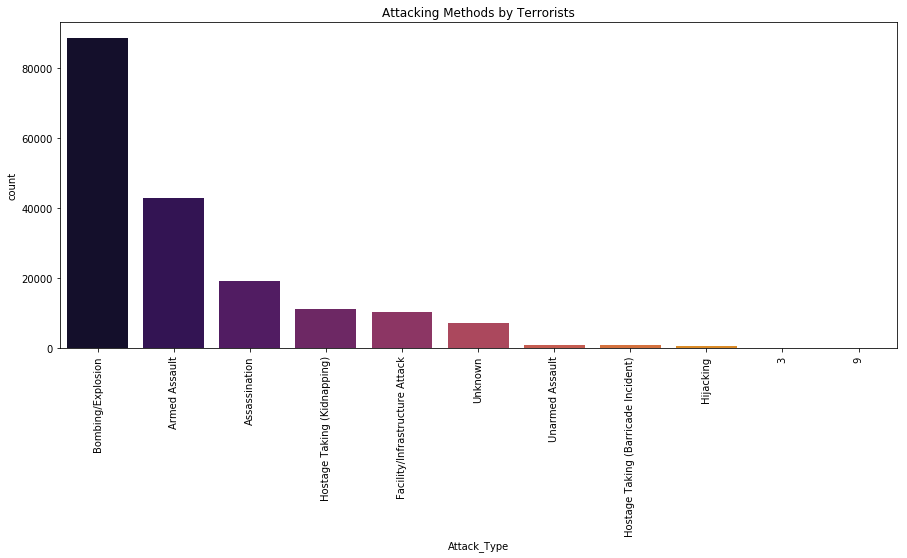

In [21]:
### Attacking Methods by Terrorists
plt.subplots(figsize=(15, 6))
sns.countplot(
    'Attack_Type',
    data=terror,
    palette='inferno',
    order=terror['Attack_Type'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Attacking Methods by Terrorists')
plt.savefig('attack_method.png')

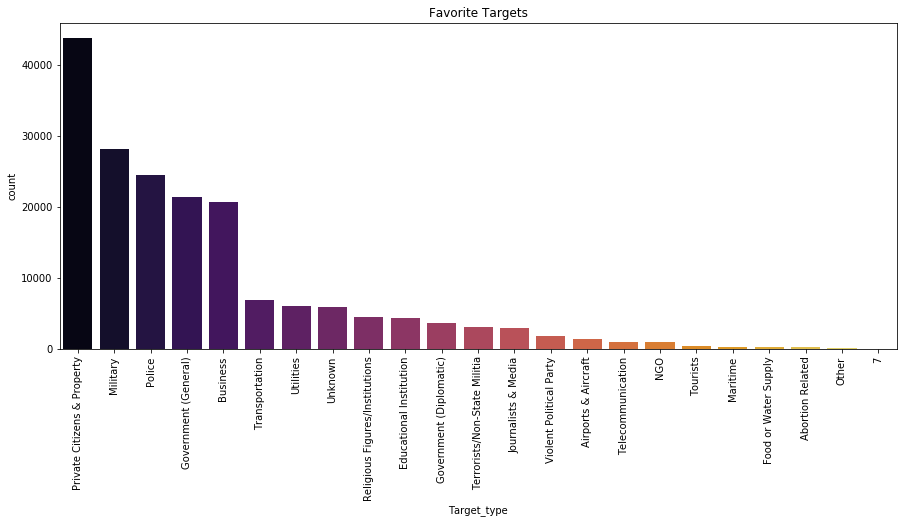

In [22]:
### Favorite Targets
plt.subplots(figsize=(15, 6))
sns.countplot(
    terror['Target_type'],
    palette='inferno',
    order=terror['Target_type'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Favorite Targets')
plt.savefig('favorite_targets.png')

## Total Terrorist Activities Dynamic Choropleth  Maps

In [9]:
### Global # of Terrorist Activities Dynamic Graph 1

terror['Casualties']=terror['Killed']+terror['Wounded']

countries = np.unique(terror['Country'])
num_terr = []

for country in countries:
    num_terr.append(len(terror[terror['Country'] == country]))
#ls_code = [pycountry.countries.get(name=cty).alpha_3 for cty in countrys]
#code = pd.DataFrame(ls_code, columns=['c2'])
data = [ dict(
        type = 'choropleth',
        locations = countries,
        z = num_terr,
        locationmode = 'country names',
        text = countries,
        marker = dict(
            line = dict(color = 'rgb(0,0,0)', width = 1)),
            colorbar = dict(autotick = True, tickprefix = '', 
            title = '# Terrorist\nActivities')
            )
       ]
layout = dict(
    title = '1970-2017 Total Terrorist Activities in Countries',
    width=750,
    height=750,
    geo = dict(
        showframe = False,
        showocean = True,
        oceancolor = 'rgb(0,255,255)',
        projection = dict(
        type = 'orthographic',
            rotation = dict(
                    lon = 60,
                    lat = 10),
        ),
        lonaxis =  dict(
                showgrid = True,
                gridcolor = 'rgb(102, 102, 102)'
            ),
        lataxis = dict(
                showgrid = True,
                gridcolor = 'rgb(102, 102, 102)'
                )
            ),
        )

fig = dict(data=data, layout=layout)
py.iplot(fig, validate=False, filename='worldmap')

# No Terroist Activity Country: Greenland, Mongolia, Oman, Djibouti, Kosovo

In [10]:
### Global # of Terrorist Activities Dynamic Graph 2
data = [ dict(
        type = 'choropleth',
        locations = countries,
        z = num_terr,
        locationmode = 'country names',
        text = countries,
        marker = dict(
            line = dict(color = 'rgb(0,0,0)', width = 1)),
            colorbar = dict(autotick = True, tickprefix = '',
            title = '# Terrorist\nActivities'),
            )
       ]

layout = dict(
    title = '1970-2017 Total Terrorist Activities in Countries',
    geo = dict(
        showframe = False,
        showocean = True,
        oceancolor = 'rgb(0,255,255)',
        type = 'equirectangular'
    ),
)

fig = dict(data=data, layout=layout)
py.iplot(fig, validate=False, filename='world_temp_map')

In [11]:
### Match State and State Code

#!pip install us    #Must Install this
import us
us_df = terror[terror['Country'] == 'United States']
state = us_df.groupby('provstate').size().to_frame()
state.reset_index(inplace=True)
codedict = us.states.mapping('name', 'abbr')
state['state_code'] = state['provstate'].map(codedict)
# assign US Virginia Lands code VI and remove unknown
state.loc[45,'state_code'] = 'VI'
state.drop(46,inplace=True)
state.reset_index(inplace=True)
zls = [state.loc[x,0] for x in range(len(state))]
cls = [state.loc[y,'state_code'] for y in range(len(state))]
tls = [str(state.loc[z,'provstate'])+': '+str(state.loc[z,0]) for z in range(len(state))]


In [12]:
### US # of Terrorist Activities Dynamic Graph by States

from plotly.graph_objs import *
trace1 = {
  "z": zls, 
  "autocolorscale": False, 
  "colorbar": {"title": "# of Total Terrorist Activities"}, 
  "colorscale": [
      [0.0, "rgb(242,240,247)"], [0.2, "rgb(218,218,235)"], [0.4, "rgb(188,189,220)"], [0.6, "rgb(158,154,200)"], [0.8, "rgb(117,107,177)"], [1.0, "rgb(84,39,143)"]], 
  'locationmode':'USA-states', 
  "locations": cls, 
  "marker": {"line": {
      "color": "rgb(255,255,255)", 
      "width": 2
    }}, 
  "text": tls, 
  "type": "choropleth"
}
data = Data([trace1])
layout = {
    'width':1000,
    'height':500,
    "geo": {
        "lakecolor": "rgb(255, 255, 255)", 
        "projection": {"type": "albers usa"}, 
        "scope": "usa", 
        "showlakes": True
    }, 
    "title": "1970-2017 Terrorist Activities in US by State<br>"
}
fig = Figure(data=data, layout=layout)
plot_url = py.iplot(fig)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182438 entries, 0 to 182437
Columns: 135 entries, eventid to related
dtypes: float64(51), int64(15), object(69)
memory usage: 187.9+ MB


In [10]:
terror.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182438 entries, 0 to 182437
Data columns (total 24 columns):
Year              182438 non-null int64
country           182438 non-null int64
Country           182438 non-null object
region            182438 non-null int64
Region            182438 non-null object
provstate         182017 non-null object
city              182004 non-null object
latitude          177136 non-null object
longitude         177134 non-null float64
Summary           116308 non-null object
success           182437 non-null float64
attacktype1       182438 non-null int64
Attack_Type       182438 non-null object
targtype1         182436 non-null float64
Target_type       182438 non-null object
Group             182436 non-null object
Motive            51303 non-null object
weaptype1         182438 non-null int64
Weapon_type       182438 non-null object
Killed            172107 non-null float64
Wounded           166086 non-null float64
propextent_txt    64501 non-n

In [0]:
# df=pd.read_csv("globalterrorismdb_revised.csv",encoding="ISO-8859-1")

D:\Softwares\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (4,6,13,19,30,31,33,36,40,42,61,62,63,65,76,79,83,85,90,92,94,96,107,114,115,121,130) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## Total Terrorism Casualties Animation Maps

In [4]:
terror.head()

,iyear,country,country_txt,region,region_txt,provstate,city,latitude,longitude,summary,...,targtype1,targtype1_txt,gname,motive,weaptype1,weaptype1_txt,nkill,nwound,propextent_txt,dbsource
0,1970,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.4568,-69.951164,NaN,...,14.0,Private Citizens & Property,MANO-D,NaN,13,Unknown,1.0,0.0,NaN,PGIS
1,1970,130,Mexico,1,North America,Federal,Mexico city,19.3719,-99.086624,NaN,...,7.0,Government (Diplomatic),23rd of September Communist League,NaN,13,Unknown,0.0,0.0,NaN,PGIS
2,1970,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.4786,120.599741,NaN,...,10.0,Journalists & Media,Unknown,NaN,13,Unknown,1.0,0.0,NaN,PGIS
3,1970,78,Greece,8,Western Europe,Attica,Athens,37.9975,23.762728,NaN,...,7.0,Government (Diplomatic),Unknown,NaN,6,Explosives,NaN,NaN,NaN,PGIS
4,1970,101,Japan,4,East Asia,Fukouka,Fukouka,33.5804,130.396361,NaN,...,7.0,Government (Diplomatic),Unknown,NaN,8,Incendiary,NaN,NaN,NaN,PGIS


In [35]:
terror.isnull().sum()

Year                   0
country                0
Country                0
region                 0
Region                 0
provstate            421
city                 434
latitude            5302
longitude           5304
Summary            66130
success                1
attacktype1            0
Attack_Type            0
targtype1              2
Target_type            0
Group                  2
Motive            131135
weaptype1              0
Weapon_type            0
Killed             10331
Wounded            16352
propextent_txt    117937
dbsource               1
casualities        16918
Casualties         16918
dtype: int64

In [13]:
terror.columns.get_loc('Killed')

19

In [14]:
## Try one year data on the map first
yr_data=terror[terror['Year']==1990]
counts = yr_data.groupby(['latitude', 'longitude'])

#### Sizes According to Casualties (killed and wounded)

In [15]:
## Rescaling, using casualties = nkill + nwound
sizes= (counts.Killed.sum()+counts.Wounded.sum()) * 0.8

In [16]:
sizes

latitude    longitude 
-45.571112  -72.068517     0.0
-39.820083  -73.245395     0.0
-38.734133  -72.584651     0.0
-37.997567  -57.548230     0.8
-36.816006  -73.037659     0.8
-36.748146  -73.112320     0.8
-36.733394  -72.983190     0.0
-36.609282  -72.102064     0.0
-35.430580  -71.657620     0.0
-34.921295  -57.954333     0.0
-34.891151  -56.187214     0.0
-34.686310  -58.528473     0.0
-34.617680  -58.444435     0.8
-34.040083   18.677805     1.6
-33.995515   18.584543     0.0
-33.982630   18.569386     0.0
-33.944709   18.532097     0.0
-33.941849   18.419640     2.4
-33.926340   18.416290     0.0
-33.366238  -70.505302    28.8
-33.050125  -71.612251     0.0
-33.044823  -71.373466     0.0
-33.010693  -71.527794     6.4
-32.985771   27.866086     0.0
-32.951052  -60.666365     0.0
-32.949255   27.734962     0.8
-32.880343  -71.249811     0.0
-31.605074   28.776498     3.2
-31.079990   28.366274     0.0
-30.738701   30.281860     1.6
                          ... 
 54.508530  -6.7

In [17]:
## Get coordinates pair. lat first, long second
coordinate_pairs = list(counts.count().index)

In [18]:
lats = [tuple_[0] for tuple_ in coordinate_pairs]
longs = [tuple_[1] for tuple_ in coordinate_pairs]

#### Use Mercator Projection with Cartopy

Text(0.5, 1.0, 'Animation Of Terrorist Activities\nYear:1990')

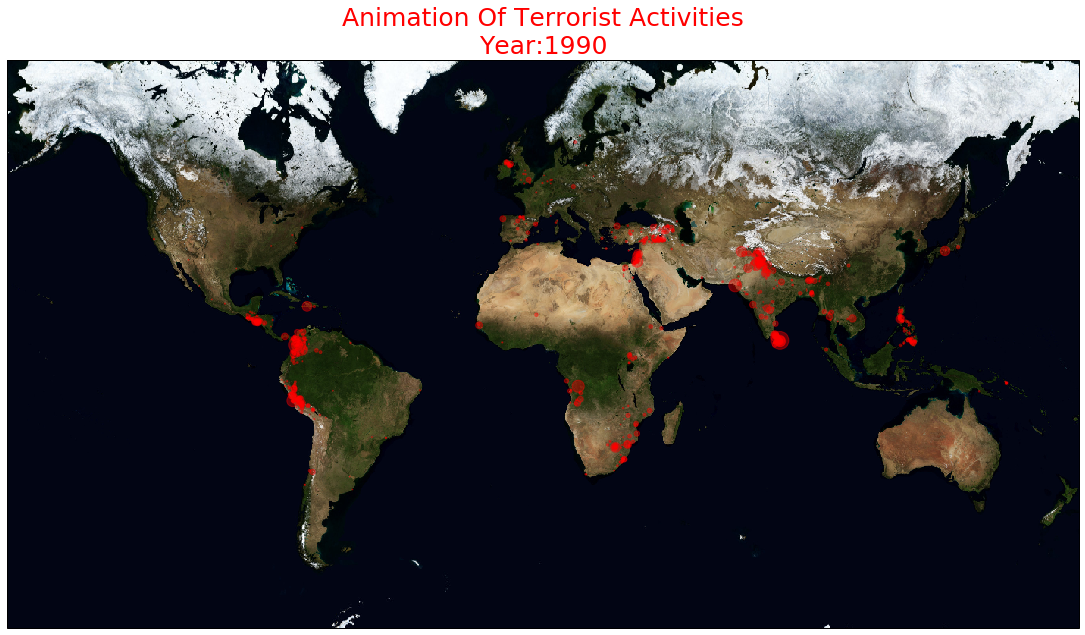

In [19]:
fig = plt.figure(figsize=(19.2, 10.8)) ## for printing on 1920*1080 resol
ax = plt.axes(projection=ccrs.Mercator(central_longitude=0,  
                                       min_latitude=-65,
                                       max_latitude=70))
# You need to put images.json into cartopy\data\raster\natural_earth, and copied 'BMNG_hirez.png' into the same directory 
ax.background_img(name='BM',resolution='high') ##use high in the end
ax.set_extent([-170, 179, -65, 70], crs=ccrs.PlateCarree())
ax.scatter(longs, lats, s=sizes,
               color='red', alpha=0.4,
               transform=ccrs.PlateCarree())
ax.set_title('Animation Of Terrorist Activities'+'\n'+'Year:1990',fontsize=25,color='red')


### All-in-One Function for World Animation Map

D:\Softwares\Anaconda\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


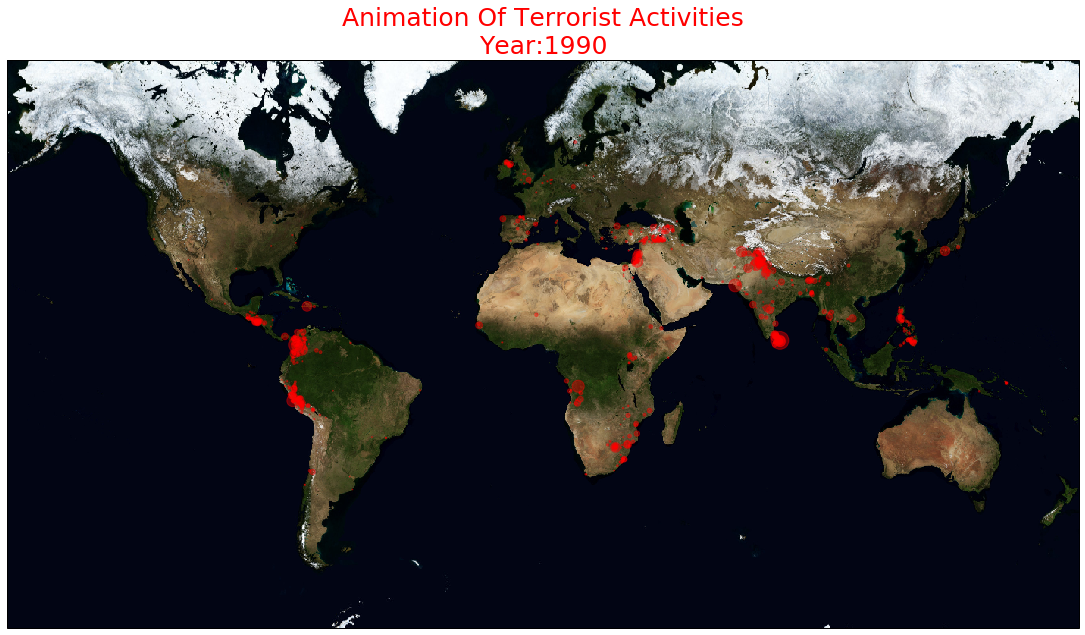

In [0]:
fig = plt.figure(figsize=(19.2, 10.8))
def animation_map(year):
    yr_data=terror[terror['Year']==year]
    counts = yr_data.groupby(['latitude', 'longitude'])
    sizes= (counts.Killed.sum()+counts.Wounded.sum()) * 0.8
    coordinate_pairs = list(counts.count().index)
    lats = [tuple_[0] for tuple_ in coordinate_pairs]
    longs = [tuple_[1] for tuple_ in coordinate_pairs]
    
    
    ax = plt.axes(projection=ccrs.Mercator(central_longitude=0,  
                                       min_latitude=-65,
                                       max_latitude=70))
    ax.clear()
    # You need to put images.json into cartopy\data\raster\natural_earth, and copied 'BMNG_hirez.png' into the same directory 
    ax.background_img(name='BM',resolution='high') ##use high in the end
    ax.set_extent([-170, 179, -65, 70], crs=ccrs.PlateCarree())
    ax.scatter(longs, lats, s=sizes,
                   color='red', alpha=0.4,
                   transform=ccrs.PlateCarree())
    ax.set_title('Animation Of Terrorist Activities'+'\n'+'Year:'+str(year),fontsize=25,color='red')
ani = animation.FuncAnimation(fig,animation_map,list(terror.iyear.unique())[20:], interval = 1500)   
ani.save('animation.gif', writer='pillow', fps=1)


#### Run If You Want to See Animation

In [0]:
# plt.close(1)
# filename = 'animation.gif'
# video = io.open(filename, 'r+b').read()
# encoded = base64.b64encode(video)
# HTML(data='''<img src="data:image/gif;base64,{0}" type="gif" />'''.format(encoded.decode('ascii')))

#### Making Pics instead of one GIF

In [0]:
def world_map(year):
    
    yr_data=terror[terror['Year']==year]
    counts = yr_data.groupby(['latitude', 'longitude'])
    sizes= (counts.Killed.sum()+counts.Wounded.sum()) * 0.8
    coordinate_pairs = list(counts.count().index)
    lats = [tuple_[0] for tuple_ in coordinate_pairs]
    longs = [tuple_[1] for tuple_ in coordinate_pairs]
    
    fig, ax = plt.subplots(figsize=(19.2, 10.8), subplot_kw=dict(projection=ccrs.PlateCarree()))
    ax.set_extent([-170, 179, -65, 70])
    # You need to put images.json into cartopy\data\raster\natural_earth, and copied 'BMNG_hirez.png' into the same directory 
    ax.background_img(name='BM',resolution='high')
    ax.scatter(longs, lats, s=sizes,
               color='red', alpha=0.4,
               transform=ccrs.PlateCarree())
    ax.set_title('Terrorist Attacks and Casualties Worldwide, 1990-2017'+'\n'+'Year:'+str(year),
                 fontsize=30,fontname='Arial',color='red')

    return fig, ax
for i in range(1990,2018):
    fig, ax = world_map(i)
    fig.savefig(f"World/year_{i:04d}.png", dpi=300, frameon=False, facecolor='w') ##save to local, using ffmpeg to make mp4 animation
    ax.clear()
    plt.close(1)

### USA Animation Map

#### Test on 2001 Data (Indication of 911 Attack)

Text(0.5, 1.0, 'Terrorist Activities in the United States\nYear:2001')

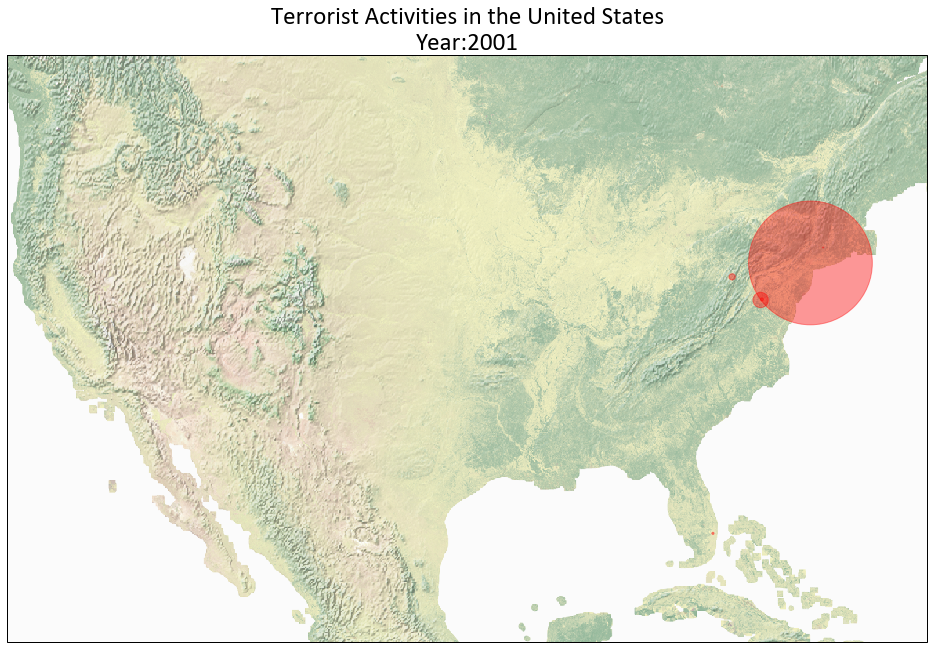

In [0]:
terror_usa = terror[terror["country"]==217]

yr_data=terror_usa[terror_usa['iyear']==2001]
counts = yr_data.groupby(['latitude', 'longitude'])
sizes= (counts.nkill.sum()+counts.nwound.sum()) * 0.8
coordinate_pairs = list(counts.count().index)
lats = [tuple_[0] for tuple_ in coordinate_pairs]
longs = [tuple_[1] for tuple_ in coordinate_pairs]

fig = plt.figure(figsize=(19.2, 10.8))
ax = plt.axes(projection=ccrs.Mercator(central_longitude=-96,  
                                       min_latitude=20,
                                       max_latitude=50))
# You need to put images.json into cartopy\data\raster\natural_earth, and copied 'NE1_50M_SR.tif' into the same directory 
ax.background_img(name='ne_shaded',resolution='high') ##use high in the end
ax.set_extent([-125, -66.5, 20, 50], crs=ccrs.PlateCarree())
ax.scatter(longs, lats, s=sizes,
               color='red', alpha=0.4,
               transform=ccrs.PlateCarree())
ax.set_title('Terrorist Activities in the United States'+'\n'+'Year:'+str(2001),fontsize=25,color='black',fontname='calibri')

#### Animation Function (Add-in Border and Coastline)

In [0]:
terror_usa = terror[terror["country"]==217]
def us_states(year):
    
    yr_data=terror_usa[terror_usa['iyear']==year]
    counts = yr_data.groupby(['latitude', 'longitude'])
    sizes= (counts.nkill.sum()+counts.nwound.sum()) * 2.5
    coordinate_pairs = list(counts.count().index)
    lats = [tuple_[0] for tuple_ in coordinate_pairs]
    longs = [tuple_[1] for tuple_ in coordinate_pairs]
    
    fig, ax = plt.subplots(figsize=(19.2, 10.8), subplot_kw=dict(projection=ccrs.PlateCarree()))
    ax.set_extent([-125, -66.5, 20, 50])
    # You need to put images.json into cartopy\data\raster\natural_earth, and copied 'NE1_50M_SR.tif' into the same directory 
    ax.background_img(name='ne_shaded',resolution='high')
    ax.add_feature(LAND)
    ax.add_feature(COASTLINE)
    ax.scatter(longs, lats, s=sizes,
               color='red', alpha=0.8,
               transform=ccrs.PlateCarree())
    ax.set_title('Terrorist Activities in the United States, 1990-2017'+'\n'+'Year:'+str(year),
                 fontsize=28,fontname='Calibri',color='red')

    return fig, ax


In [0]:
for i in range(1990,2018):
    fig, ax = us_states(i)
    states = NaturalEarthFeature(category='cultural', scale='50m', facecolor='none',
                                 name='admin_1_states_provinces_shp')
    ax.add_feature(states, edgecolor='gray')
    fig.savefig(f"USanimation/year_{i:04d}.png", dpi=100, frameon=False, facecolor='w') ##save to local, using ffmpeg to make mp4 animation
    ax.clear()
    plt.close(1)

### Iraq Animation Map

In [0]:
terror_iraq = terror[terror["country_txt"]=='Iraq']
def iraq_states(year):
    
    yr_data=terror_iraq[terror_iraq['iyear']==year]
    counts = yr_data.groupby(['latitude', 'longitude'])
    sizes= (counts.nkill.sum()+counts.nwound.sum()) * 2.4
    coordinate_pairs = list(counts.count().index)
    lats = [tuple_[0] for tuple_ in coordinate_pairs]
    longs = [tuple_[1] for tuple_ in coordinate_pairs]
    
    fig, ax = plt.subplots(figsize=(19.2, 10.8), subplot_kw=dict(projection=ccrs.PlateCarree()))
    ax.set_extent([30, 60, 20, 40])
    # You need to put images.json into cartopy\data\raster\natural_earth, and copied 'NE1_50M_SR.tif' into the same directory 
    ax.background_img(name='ne_shaded',resolution='high')
    ax.add_feature(LAND)
    ax.add_feature(COASTLINE)
    ax.scatter(longs, lats, s=sizes,
               color='red', alpha=0.8,
               transform=ccrs.PlateCarree())
    ax.set_title('Terrorist Activities in Iraq, 2000-2017'+'\n'+'Year:'+str(year),
                 fontsize=30,fontname='Calibri',color='red')

    return fig, ax
for i in range(2000,2018):
    fig, ax = iraq_states(i)
    states = NaturalEarthFeature(category='cultural', scale='10m', facecolor='none',
                                 name='admin_1_states_provinces_lakes_shp')
    ax.add_feature(states, edgecolor='gray')
    fig.savefig(f"Iraq/year_{i:04d}.png", dpi=100, frameon=False, facecolor='w') ##save to local, using ffmpeg to make mp4 animation
    ax.clear()
    plt.close(1)

#### Use ffmpeg to create animation video 

In [0]:
##ffmpeg -r 1 -start_number 1990 -i 'year_%4d.png' -c:v libx264 -pix_fmt yuv420p -s 1920x1080 project.mp4

## Text Mining & Word Clouds

### Preprocessing 

In [55]:
# Categorize dataframe by terror group and Rank the groups by activity count
group_rank = terror.groupby(['Group']).size().reset_index(name='counts').sort_values(by='counts', axis=0,ascending=False)
#Select top 10 groups (Eliminate the first: unknown)
group_list = list(group_rank['Group'].iloc[1:12]) # Prepare one more group because we later found FMLN has no summaries
print(group_list)

terror_10groups = pd.DataFrame([])
for group in group_list:
    terror_10groups = terror_10groups.append(terror[terror['Group'] == group])
terror_10groups.head()


['Taliban', 'Islamic State of Iraq and the Levant (ISIL)', 'Shining Path (SL)', 'Farabundo Marti National Liberation Front (FMLN)', 'Al-Shabaab', "New People's Army (NPA)", 'Irish Republican Army (IRA)', 'Revolutionary Armed Forces of Colombia (FARC)', 'Boko Haram', "Kurdistan Workers' Party (PKK)", 'Basque Fatherland and Freedom (ETA)']


,Year,country,Country,region,Region,provstate,city,latitude,longitude,Summary,...,Target_type,Group,Motive,weaptype1,Weapon_type,Killed,Wounded,propextent_txt,dbsource,casualities
59787,1995,4,Afghanistan,6,South Asia,Unknown,Unknown,NaN,NaN,NaN,...,Police,Taliban,NaN,13,Unknown,0.0,0.0,NaN,PGIS,0.0
60761,1995,4,Afghanistan,6,South Asia,Kandahar,Kandahar,31.6311,65.742226,NaN,...,Airports & Aircraft,Taliban,NaN,6,Explosives,0.0,0.0,NaN,PGIS,0.0
61209,1995,4,Afghanistan,6,South Asia,Kandahar,Kandahar,31.6311,65.742226,NaN,...,Airports & Aircraft,Taliban,NaN,6,Explosives,0.0,0.0,NaN,PGIS,0.0
61533,1995,4,Afghanistan,6,South Asia,Kabul,Kabul,34.5169,69.147011,NaN,...,Airports & Aircraft,Taliban,NaN,6,Explosives,0.0,0.0,NaN,PGIS,0.0
72429,2001,4,Afghanistan,6,South Asia,Bamyan,Yakawlang,34.7333,66.966667,1/7/2001: Taliban militia regained control of ...,...,Private Citizens & Property,Taliban,"Specific motive is unknown; however, survivors...",5,Firearms,150.0,NaN,NaN,UMD Schmid 2012,NaN


In [56]:
# Check if the groups have enough summaries to analyze
for group in group_list: 
    df_ = terror_10groups[terror_10groups['Group']==group].dropna(subset=['Summary'])
    if len(df_) == 0:
        print('Group ', group, ' has no summaries!')
    elif len(df_) <= 10:
        print('Group ', group, ' has too few summaries!')

Group  Farabundo Marti National Liberation Front (FMLN)  has no summaries!


In [57]:
# Drop NAN Summaries and merge the summaries of each group
terror_summary = terror_10groups.dropna(subset=['Summary'])
grouped = terror_summary.groupby(['Group'])['Summary'].transform(lambda x: '\n'.join(x))
grouped
#Keep the unique ones
grouped = grouped.drop_duplicates()
grouped

72429     1/7/2001: Taliban militia regained control of ...
115878    03/12/2013: Assailants abducted Federico Motka...
54766     01/22/1993: Sendero Luminoso was responsible f...
85412     11/02/2007: Al-Shabaab claimed a hotel blast i...
69283     02/17/1999: The New People's Army (NPA) kidnap...
2722      12/18/1974: An explosive device planted in a g...
54786     01/31/1993: One hundred-fifty members of the R...
93703     07/27/2009: On Monday, in one of three related...
54769     01/23/1993: Explosives and automatic weapons w...
27270     2/6/1986: Two suspected members of Basque Fath...
Name: Summary, dtype: object

In [58]:
# Reset the index of grouped
grouped.reset_index(name='summary',drop=True, inplace=True)
grouped

0    1/7/2001: Taliban militia regained control of ...
1    03/12/2013: Assailants abducted Federico Motka...
2    01/22/1993: Sendero Luminoso was responsible f...
3    11/02/2007: Al-Shabaab claimed a hotel blast i...
4    02/17/1999: The New People's Army (NPA) kidnap...
5    12/18/1974: An explosive device planted in a g...
6    01/31/1993: One hundred-fifty members of the R...
7    07/27/2009: On Monday, in one of three related...
8    01/23/1993: Explosives and automatic weapons w...
9    2/6/1986: Two suspected members of Basque Fath...
Name: summary, dtype: object

### Summarization of summaries 

In [59]:
from wordcloud import WordCloud, STOPWORDS
import nltk
from nltk.corpus import PlaintextCorpusReader
from nltk import sent_tokenize,word_tokenize 
from nltk.book import *
import gensim.summarization
import re

In [73]:
# Clean texts of summaries and summarize the summaries
for i in range(len(grouped)):

    # The whole loop will take tens of minutes, you can just try the first/second one as an example 
    # Trial
    if i > 0:
         break
            
    text = grouped[i]
    summary_sentences = []
    # strip the dates from texts
    text = re.sub(r'\d+/\d+/\d{4}:', ' ', text)
    # clear spaces and tabs
    striptext = text.replace('\n\n', ' ')
    striptext = striptext.replace('\n', ' ')
    # summarize the summary into ~100 words
    summary = gensim.summarization.summarize(striptext, word_count=100)
    # Overview:
    print("Original text contains ", len(grouped[i].split()), "words.")
    print("Summarized text contains ", len(summary.split()), "words.\n")
    
    print('Summarized:\n',summary,'\n')
    print('Original Text:\n', grouped[i][:1000],'......\n')
    

Original text contains  342697 words.
Summarized text contains  90 words.

Summarized:
 One Afghan civilian security officer was killed and two others were wounded when an unknown number of Taliban perpetrators detonated an improvised explosive device (IED) and fired small arms at a vehicle of the American-owned USPI security company in Sangi Sar, Zherai District, Kandahar Province, Afghanistan.
Three Afghan Police officers were killed and four others were wounded when an improvised explosive device (IED) planted by an unknown number of Taliban perpetrators detonated adjacent to their vehicle at approximately 10:00 AM on a road in Zinjabat, Panjwaii District, Kandahar Province, Afghanistan. 

Original Text:
 1/7/2001: Taliban militia regained control of Yakawlang town, Bamyan, Afghanistan.  For the next three days, the Taliban proceeded to go from house to house, gathering and shooting the local men.  Reports indicate that at least 170 people were killed in the attack.  Sources indicat

### Topic Analyses

In [62]:
from gensim import corpora
from gensim.models.ldamodel import LdaModel
from gensim.parsing.preprocessing import STOPWORDS
import pprint
from operator import itemgetter

In [63]:
# Function: Prepare the text, Rank the words and Extract the topics\
def topic_analysis(text):
    #strip the dates and numbers from text
    text = re.sub(r'\d+/\d+/\d{4}:', ' ', text) #In case the whole loop above has not been run
    text = re.sub(r'\d+','',text)
    text = re.sub(r'//:', ' ', text)
    sents = sent_tokenize(text)
    for j in range(len(sents)):
        sent = sents[j]
        sent = sent.strip().replace('\n','')
        sents[j] = sent
    text = '. '.join(sents)
    
    #Create a (word,frequency) dictionary for each word in each group text
    texts = [[word for word in text.lower().split()
            if word not in STOPWORDS and word.isalnum()
              and not word.lower() == 'able'and not word.lower() == 'unknown'
              and not word.lower() =='attributed'and not word.lower() == 'claimed'
              and not word.lower() =='responsibility'and not word.lower() =='group'
             ]]
        # or other words: and not word.lower() == 'slate'
    dictionary = corpora.Dictionary(texts)
#     print(dictionary)
    corpus = [dictionary.doc2bow(text) for text in texts] 
    
    # LDA
    # Set parameters
    num_topics = 5 #The number of topics that should be generated
    passes = 10
    lda = LdaModel(corpus,
              id2word=dictionary,
              num_topics=num_topics,
              passes=passes)
    
    pp = pprint.PrettyPrinter(indent=4)
    pp.pprint(lda.print_topics(num_words=8))
    
    lda.get_document_topics(corpus[0],minimum_probability=0.05,per_word_topics=False)
    sorted(lda.get_document_topics(corpus[0],minimum_probability=0,per_word_topics=False),key=itemgetter(1),reverse=True)

    return lda.print_topic(topicno=2)
    

In [64]:
# Analyze topics for all the 10 groups
all_summary = grouped.str.cat(sep='\n ')
print(topic_analysis(all_summary))

[   (   0,
        '0.007*"assailants" + 0.004*"sources" + 0.004*"killed" + '
        '0.004*"attack" + 0.003*"police" + 0.002*"injured" + 0.002*"iraq" + '
        '0.002*"explosive"'),
    (   1,
        '0.028*"assailants" + 0.027*"killed" + 0.013*"sources" + '
        '0.012*"detonated" + 0.011*"attack" + 0.011*"police" + 0.010*"injured" '
        '+ 0.009*"attacks"'),
    (   2,
        '0.002*"assailants" + 0.001*"killed" + 0.001*"sources" + '
        '0.001*"attack" + 0.001*"police" + 0.001*"attacks" + 0.001*"attacked" '
        '+ 0.001*"levant"'),
    (   3,
        '0.005*"assailants" + 0.004*"sources" + 0.004*"attack" + '
        '0.003*"killed" + 0.003*"police" + 0.003*"injured" + 0.002*"attacked" '
        '+ 0.002*"detonated"'),
    (   4,
        '0.042*"assailants" + 0.031*"killed" + 0.026*"sources" + '
        '0.023*"attack" + 0.020*"police" + 0.018*"injured" + 0.017*"detonated" '
        '+ 0.015*"attacked"')]
0.002*"assailants" + 0.001*"killed" + 0.001*"sources" + 0.

In [65]:
# Analyze topics for each group
for i in range(len(grouped)):
    print(topic_analysis(grouped[i]))
    

[   (   0,
        '0.001*"assailants" + 0.001*"police" + 0.001*"killed" + '
        '0.001*"taliban" + 0.001*"attack" + 0.001*"injured" + 0.001*"afghan" + '
        '0.001*"attacked"'),
    (   1,
        '0.012*"assailants" + 0.011*"police" + 0.010*"taliban" + '
        '0.009*"killed" + 0.006*"attacked" + 0.005*"attack" + 0.004*"injured" '
        '+ 0.004*"detonated"'),
    (   2,
        '0.010*"assailants" + 0.009*"taliban" + 0.008*"killed" + '
        '0.007*"attacked" + 0.007*"police" + 0.005*"injured" + '
        '0.004*"officers" + 0.004*"sources"'),
    (   3,
        '0.052*"assailants" + 0.042*"taliban" + 0.039*"killed" + '
        '0.039*"police" + 0.021*"attacked" + 0.020*"attack" + 0.020*"injured" '
        '+ 0.018*"sources"'),
    (   4,
        '0.007*"police" + 0.007*"assailants" + 0.006*"killed" + '
        '0.006*"taliban" + 0.004*"attacked" + 0.003*"attack" + 0.003*"sources" '
        '+ 0.003*"injured"')]
0.010*"assailants" + 0.009*"taliban" + 0.008*"killed" + 0

[   (   0,
        '0.001*"kurdistan" + 0.001*"party" + 0.001*"killed" + 0.001*"sources" '
        '+ 0.001*"assailants" + 0.001*"attack" + 0.001*"injured" + '
        '0.001*"military"'),
    (   1,
        '0.006*"party" + 0.005*"kurdistan" + 0.004*"sources" + 0.003*"attack" '
        '+ 0.003*"assailants" + 0.003*"injured" + 0.002*"killed" + '
        '0.002*"police"'),
    (   2,
        '0.061*"party" + 0.059*"kurdistan" + 0.042*"sources" + '
        '0.039*"assailants" + 0.035*"attack" + 0.028*"killed" + '
        '0.022*"injured" + 0.021*"police"'),
    (   3,
        '0.003*"kurdistan" + 0.003*"party" + 0.002*"sources" + 0.002*"attack" '
        '+ 0.002*"assailants" + 0.002*"killed" + 0.002*"police" + '
        '0.001*"injured"'),
    (   4,
        '0.003*"party" + 0.002*"kurdistan" + 0.002*"sources" + 0.002*"attack" '
        '+ 0.002*"assailants" + 0.001*"killed" + 0.001*"police" + '
        '0.001*"injured"')]
0.061*"party" + 0.059*"kurdistan" + 0.042*"sources" + 0.039*"as

### Word Cloud

In [71]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline
from random import shuffle
import codecs
from scipy.misc import imread

In [67]:
def draw_wordcloud(lda,topicnum,min_size=0,STOPWORDS=[]):
    word_list=[]
    prob_total = 0
    for word,prob in lda.show_topic(topicnum,topn=50):
        prob_total +=prob
    for word,prob in lda.show_topic(topicnum,topn=50):
        if word in STOPWORDS or  len(word) < min_size:
            continue
        freq = int(prob/prob_total*1000)
        alist=[word]
        word_list.extend(alist*freq)

    shuffle(word_list)
    text = ' '.join(word_list)
    wordcloud = WordCloud(stopwords=STOPWORDS,background_color='black',max_words=30).generate(text)

    plt.axis('off')
    plt.imshow(wordcloud)

    return None

#### Group Example: Taliban

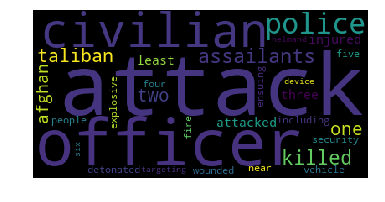

In [68]:
### Prepare LDA
#strip the dates and numbers from text
text = grouped[0]
text = re.sub(r'\d+/\d+/\d{4}:', ' ', text) #In case the whole loop above has not been run
text = re.sub(r'\d+','',text)
text = re.sub(r'//:', ' ', text)
sents = sent_tokenize(text)
for j in range(len(sents)):
    sent = sents[j]
    sent = sent.strip().replace('\n','')
    sents[j] = sent
text = '. '.join(sents)

#Create a (word,frequency) dictionary for each word in each group text
texts = [[word for word in text.lower().split()
        if word not in STOPWORDS and word.isalnum()
          and not word.lower() == 'able'and not word.lower() == 'unknown'
          and not word.lower() =='attributed'and not word.lower() == 'claimed'
          and not word.lower() =='responsibility'and not word.lower() =='group'
         ]]
    # or other words: and not word.lower() == 'slate'
dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts] 

# LDA
# Set parameters
num_topics = 10 #The number of topics that should be generated
passes = 20
lda = LdaModel(corpus,
          id2word=dictionary,
          num_topics=num_topics,
          passes=passes)

draw_wordcloud(lda,4,STOPWORDS=['responsibility','attributed','claimed','sources','group','causing'])

#### Motives Behind Attacks

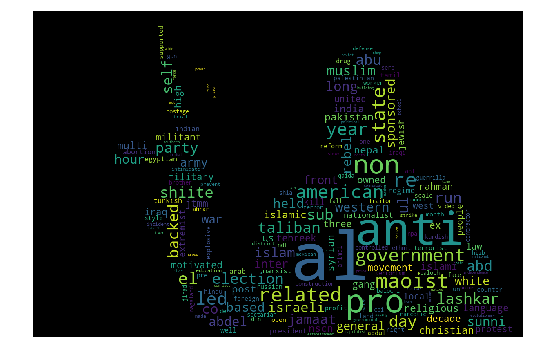

In [72]:
# Word cloud with embedded terrorist image
motive=df['motive'].str.lower().str.replace(r'\|', ' ').str.cat(sep=' ')
words=nltk.tokenize.word_tokenize(motive)
word_dist = nltk.FreqDist(words)
stopwords = nltk.corpus.stopwords.words('english')

terror = open('terror.jpg', 'rb').read()
# f1.write(codecs.decode(terror,'base64'))
img1 = imread("terror.jpg")
hcmask1 = img1
words_except_stop_dist = nltk.FreqDist(w for w in words if w not in stopwords) 
wordcloud = WordCloud(stopwords=STOPWORDS,background_color='black',mask=hcmask1).generate(" ".join(words_except_stop_dist))
plt.imshow(wordcloud)
fig=plt.gcf()
fig.set_size_inches(10,6)
plt.axis('off')
plt.show()

## Group Prediction

### Preprocessing Before Training

In [0]:
### get dummies
region = pd.get_dummies(terror['Region'], prefix='Region', prefix_sep=' ')
attack = pd.get_dummies(
    terror['Attack_Type'], prefix='Attack_Type', prefix_sep=' ')
target = pd.get_dummies(
    terror['Target_type'], prefix='Target_type', prefix_sep=' ')
weapon = pd.get_dummies(
    terror['Weapon_type'], prefix='Weapon_type', prefix_sep=' ')
features = ['success', 'Killed', 'Wounded'] + list(region.columns) + list(
    attack.columns) + list(target.columns) + list(weapon.columns)
terror = pd.concat([terror, region, attack, target, weapon], axis=1)

### drop NA
terror_notnull = terror.dropna()
### we take groups that made terrorists more than 100 to avoid noise
groups = terror['Group'].value_counts()
groups = groups[groups >= 100].index[1:]

terror_notnull = terror_notnull[terror_notnull['Group'].isin(groups)]
terror_notnull.Group.value_counts().plot()
plt.savefig('sumgroup.png')

###before training
terror_train = terror_notnull[:6000]
terror_test = terror_notnull[6000:]

X_train = terror_train[features]
y_train = terror_train['Group']

X_test = terror_test[features]
y_test = terror_test['Group']

#### Logit Regression

In [0]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='lbfgs', multi_class='multinomial')
model.fit(X_train, y_train)
model.predict(X_test)
model.score(X_test, y_test)

#### Naive Bayes

In [0]:
from sklearn.naive_bayes import BernoulliNB
model = BernoulliNB()
model.fit(X_train, y_train)
model.predict(X_test)
model.score(X_test, y_test)

#### KNN

In [0]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=30, weights='distance')
model.fit(X_train, y_train)
model.predict(X_test)
model.score(X_test, y_test)

#### SVC

In [0]:
from sklearn.svm import LinearSVC
model = LinearSVC(multi_class='crammer_singer')
model.fit(X_train, y_train)
model.predict(X_test)
model.score(X_test, y_test)

#### ExtraTrees

In [0]:
model = ExtraTreesClassifier(n_estimators=100, max_depth=5,  min_samples_leaf=0.02)
model.fit(X_train, y_train)
model.predict(X_test)
model.score(X_test, y_test)